In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
# building_permits_2023 = pd.read_csv("../Building_Permits_in_2023.csv")
# building_permits_2022 = pd.read_csv("../Building_Permits_in_2022.csv")
# building_permits = pd.concat(
#     [
#         building_permits_2022,
#         building_permits_2023,
#     ],
#     axis=0,
# )

import os
# Get the path to the directory where the script is located
script_dir = os.path.dirname(os.path.abspath(__file__)) if '__file__' in globals() else os.getcwd()

# Construct the file paths to the CSV files
csv_file_path_2022 = os.path.join(script_dir, '..', 'data', 'Building_Permits_in_2022.csv')
csv_file_path_2023 = os.path.join(script_dir, '..', 'data', 'Building_Permits_in_2023.csv')

# Read the CSV files into DataFrames
building_permits_2022 = pd.read_csv(csv_file_path_2022)
building_permits_2023 = pd.read_csv(csv_file_path_2023)

# Concatenate the DataFrames
building_permits = pd.concat([building_permits_2022, building_permits_2023], axis=0)



In [3]:
building_permits.shape

(58093, 44)

In [4]:
building_permits.columns

Index(['X', 'Y', 'OBJECTID', 'DCRAINTERNALNUMBER', 'ISSUE_DATE', 'PERMIT_ID',
       'PERMIT_TYPE_NAME', 'PERMIT_SUBTYPE_NAME', 'PERMIT_CATEGORY_NAME',
       'APPLICATION_STATUS_NAME', 'FULL_ADDRESS', 'DESC_OF_WORK', 'SSL',
       'ZONING', 'PERMIT_APPLICANT', 'FEE_TYPE', 'FEES_PAID', 'OWNER_NAME',
       'LASTMODIFIEDDATE', 'CITY', 'STATE', 'LATITUDE', 'LONGITUDE', 'XCOORD',
       'YCOORD', 'ZIPCODE', 'MARADDRESSREPOSITORYID', 'DCSTATADDRESSKEY',
       'DCSTATLOCATIONKEY', 'WARD', 'ANC', 'SMD', 'DISTRICT', 'PSA',
       'NEIGHBORHOODCLUSTER', 'HOTSPOT2006NAME', 'HOTSPOT2005NAME',
       'HOTSPOT2004NAME', 'BUSINESSIMPROVEMENTDISTRICT', 'GLOBALID',
       'CREATED_USER', 'CREATED_DATE', 'LAST_EDITED_USER', 'LAST_EDITED_DATE'],
      dtype='object')

In [5]:
print(building_permits.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 58093 entries, 0 to 10185
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   X                            58093 non-null  float64
 1   Y                            58093 non-null  float64
 2   OBJECTID                     58093 non-null  int64  
 3   DCRAINTERNALNUMBER           58093 non-null  float64
 4   ISSUE_DATE                   58093 non-null  object 
 5   PERMIT_ID                    58093 non-null  object 
 6   PERMIT_TYPE_NAME             58093 non-null  object 
 7   PERMIT_SUBTYPE_NAME          57246 non-null  object 
 8   PERMIT_CATEGORY_NAME         3334 non-null   object 
 9   APPLICATION_STATUS_NAME      58093 non-null  object 
 10  FULL_ADDRESS                 58093 non-null  object 
 11  DESC_OF_WORK                 22961 non-null  object 
 12  SSL                          56261 non-null  object 
 13  ZONING          

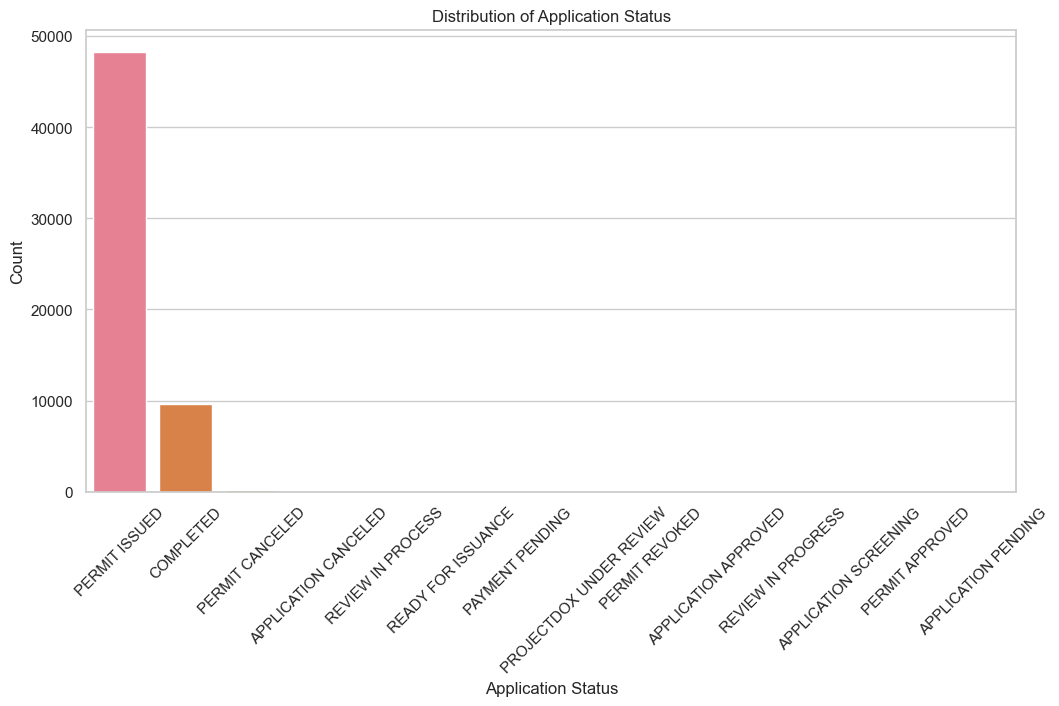

In [6]:
status_counts = building_permits['APPLICATION_STATUS_NAME'].value_counts()

# Create a bar chart with custom colors
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
palette = sns.color_palette("husl", len(status_counts))
sns.barplot(x=status_counts.index, y=status_counts.values, palette=palette)

# Customize the chart
plt.xlabel("Application Status")
plt.ylabel("Count")
plt.title("Distribution of Application Status")
plt.xticks(rotation=45)

# Save the chart as an image file
plt.savefig("application_status_chart.png", bbox_inches="tight")
plt.show()

In [7]:
building_permits['APPLICATION_STATUS_NAME'].value_counts()


PERMIT ISSUED              48301
COMPLETED                   9572
PERMIT CANCELED              139
APPLICATION CANCELED          42
REVIEW IN PROCESS             15
READY FOR ISSUANCE            14
PAYMENT PENDING                2
PROJECTDOX UNDER REVIEW        2
PERMIT REVOKED                 1
APPLICATION APPROVED           1
REVIEW IN PROGRESS             1
APPLICATION SCREENING          1
PERMIT APPROVED                1
APPLICATION PENDING            1
Name: APPLICATION_STATUS_NAME, dtype: int64

In [8]:
building_permits = building_permits[building_permits["APPLICATION_STATUS_NAME"] == 'PERMIT ISSUED']

In [9]:
building_permits.shape

(48301, 44)

In [26]:
building_permits.isnull().sum()

X                           0
Y                           0
DCRAINTERNALNUMBER          0
ISSUE_DATE                  0
PERMIT_ID                   0
PERMIT_TYPE_NAME            0
PERMIT_SUBTYPE_NAME       845
PERMIT_CATEGORY_NAME    45017
DESC_OF_WORK            28182
SSL                      1764
ZONING                   3662
PERMIT_APPLICANT        25473
FEE_TYPE                 4438
FEES_PAID                   0
OWNER_NAME               2672
LASTMODIFIEDDATE            0
LATITUDE                    0
LONGITUDE                   0
XCOORD                      0
YCOORD                      0
WARD                        0
DISTRICT                    0
dtype: int64

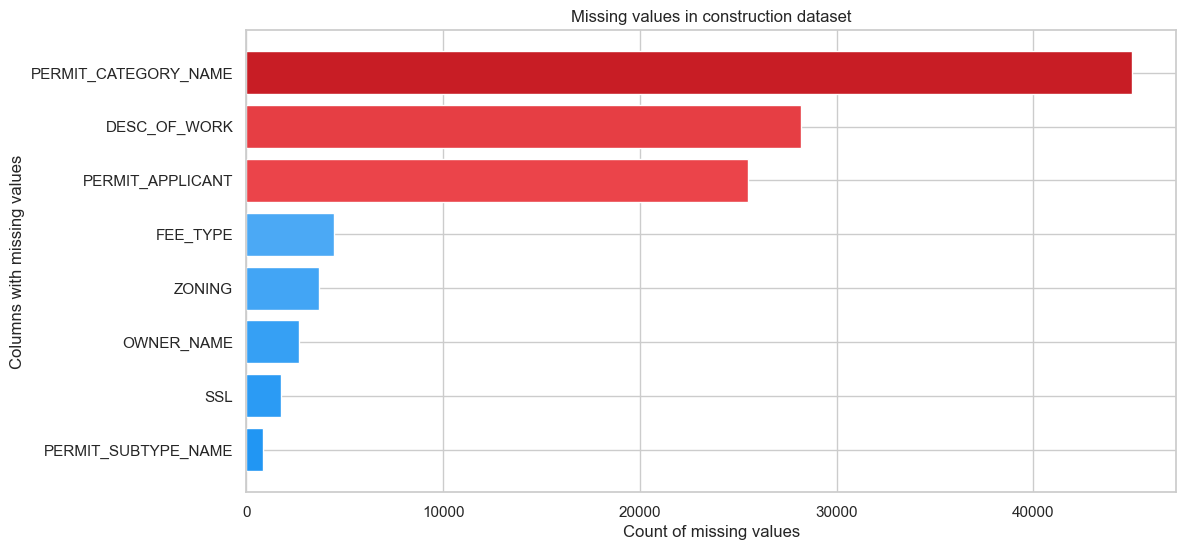

In [27]:
missing_values = building_permits.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=True)

# Define the colors and colormaps
colors_high = ["#ff5a5f", "#c81d25"]
colors_low = ["#2196f3", "#bbdefb"]
cmap_low = mpl.colors.LinearSegmentedColormap.from_list("low_map", colors_low, N=256)
cmap_high = mpl.colors.LinearSegmentedColormap.from_list("high_map", colors_high, N=256)
norm_low = mpl.colors.Normalize(missing_values.min(), missing_values.mean())
norm_high = mpl.colors.Normalize(missing_values.mean(), missing_values.max())

# Create a horizontal bar chart
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
ax = plt.gca()

# Plot bars with different colormaps
below_average = missing_values[missing_values <= missing_values.mean()]
above_average = missing_values[missing_values > missing_values.mean()]
bar1 = ax.barh(below_average.index, below_average.values, color=cmap_low(norm_low(below_average.values)), zorder=2)
bar2 = ax.barh(above_average.index, above_average.values, color=cmap_high(norm_high(above_average.values)), zorder=2)
# plt.axvline(x=missing_values.mean(), color='grey', linewidth=3)

# Customize the chart
plt.xlabel("Count of missing values")
plt.ylabel("Columns with missing values")
plt.title("Missing values in construction dataset")

# Annotate the average line
xmin, xmax = ax.get_xlim()
x_pos = missing_values.mean()/xmax + 0.03
# ax.text(x_pos, 0.88, f'Average = {missing_values.mean():.1f}', ha='right', va='center', transform=ax.transAxes, size=8, zorder=3)

# Add legend
# ax.legend([bar1, bar2], ['Below Average', 'Above Average'], loc="best", ncol=2, bbox_to_anchor=[1, 1.07], borderaxespad=0, frameon=False, fontsize=8)

# Save the chart as an image file
plt.savefig("missing_values_chart_custom.png", bbox_inches="tight")
plt.show()

In [12]:
# dropping entirely null columns
building_permits.dropna(axis=1, how='all', inplace=True)

In [13]:
# Remove unnecessary columns
columns_to_drop = [
    # "X",
    # "Y",
    # "XCOORD",
    # "YCOORD",
    "OBJECTID",  # Not Useful in the analysis
    "GLOBALID",  # Not Useful in the analysis
    "CREATED_USER",  # Not Useful in the analysis
    "LAST_EDITED_USER",  # Not Useful in the analysis
    "APPLICATION_STATUS_NAME",  # As we are keeping obeservations APPLICATION_STATUS_NAME == 'Permit Issued'
    "BUSINESSIMPROVEMENTDISTRICT",  # mostly nulls
    "CREATED_DATE",  # it is the csv file generation date which is not useful
    "LAST_EDITED_DATE",  # it is the csv file generation date which is not useful
    "MARADDRESSREPOSITORYID", # removed as it's an internal address repository ID that does not provide useful information for predicting construction duration.
    "ANC", # removed because it represents Advisory Neighborhood Commissions, which are smaller than wards and provide similar location information. We decided to use wards for simplicity.
    "SMD", # removed because it represents Single Member Districts, which are smaller than wards and provide similar location information. We decided to use wards for simplicity.
    "PSA", # removed because it represents Police Service Areas, which are unrelated to construction duration
    "FULL_ADDRESS", # removed because it is the exact address where the construction is happpening not using 
    'NEIGHBORHOODCLUSTER', # as they are smaller than wards and provide similar location information. We decided to use wards for simplicity.
]
building_permits.drop(columns=columns_to_drop, inplace=True)

In [14]:
building_permits.columns

Index(['X', 'Y', 'DCRAINTERNALNUMBER', 'ISSUE_DATE', 'PERMIT_ID',
       'PERMIT_TYPE_NAME', 'PERMIT_SUBTYPE_NAME', 'PERMIT_CATEGORY_NAME',
       'DESC_OF_WORK', 'SSL', 'ZONING', 'PERMIT_APPLICANT', 'FEE_TYPE',
       'FEES_PAID', 'OWNER_NAME', 'LASTMODIFIEDDATE', 'LATITUDE', 'LONGITUDE',
       'XCOORD', 'YCOORD', 'WARD', 'DISTRICT'],
      dtype='object')

In [15]:
building_permits['ISSUE_DATE'] = pd.to_datetime(building_permits['ISSUE_DATE'])
building_permits['LASTMODIFIEDDATE'] = pd.to_datetime(building_permits['LASTMODIFIEDDATE'])

In [28]:
building_permits.isnull().sum()

X                           0
Y                           0
DCRAINTERNALNUMBER          0
ISSUE_DATE                  0
PERMIT_ID                   0
PERMIT_TYPE_NAME            0
PERMIT_SUBTYPE_NAME       845
PERMIT_CATEGORY_NAME    45017
DESC_OF_WORK            28182
SSL                      1764
ZONING                   3662
PERMIT_APPLICANT        25473
FEE_TYPE                 4438
FEES_PAID                   0
OWNER_NAME               2672
LASTMODIFIEDDATE            0
LATITUDE                    0
LONGITUDE                   0
XCOORD                      0
YCOORD                      0
WARD                        0
DISTRICT                    0
dtype: int64

In [29]:
building_permits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48301 entries, 3 to 10185
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   X                     48301 non-null  float64            
 1   Y                     48301 non-null  float64            
 2   DCRAINTERNALNUMBER    48301 non-null  float64            
 3   ISSUE_DATE            48301 non-null  datetime64[ns, UTC]
 4   PERMIT_ID             48301 non-null  object             
 5   PERMIT_TYPE_NAME      48301 non-null  object             
 6   PERMIT_SUBTYPE_NAME   47456 non-null  object             
 7   PERMIT_CATEGORY_NAME  3284 non-null   object             
 8   DESC_OF_WORK          20119 non-null  object             
 9   SSL                   46537 non-null  object             
 10  ZONING                44639 non-null  object             
 11  PERMIT_APPLICANT      22828 non-null  object             
 12  FEE_

In [30]:
duplicate_rows = building_permits.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 0


In [31]:
def get_duplicate_column_pairs(df):
    duplicate_column_pairs = {}
    for i in range(len(df.columns)):
        for j in range(i + 1, len(df.columns)):
            if df.iloc[:, i].equals(df.iloc[:, j]):
                duplicate_column_pairs[df.columns[j]] = df.columns[i]
    return duplicate_column_pairs

In [32]:
duplicate_column_pairs = get_duplicate_column_pairs(building_permits)
print(f"Duplicate column pairs: {duplicate_column_pairs}")

Duplicate column pairs: {}


In [33]:
building_permits.shape

(48301, 22)

In [34]:
building_permits.to_csv("../Data/building_permits.csv")

In [35]:
building_permits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48301 entries, 3 to 10185
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   X                     48301 non-null  float64            
 1   Y                     48301 non-null  float64            
 2   DCRAINTERNALNUMBER    48301 non-null  float64            
 3   ISSUE_DATE            48301 non-null  datetime64[ns, UTC]
 4   PERMIT_ID             48301 non-null  object             
 5   PERMIT_TYPE_NAME      48301 non-null  object             
 6   PERMIT_SUBTYPE_NAME   47456 non-null  object             
 7   PERMIT_CATEGORY_NAME  3284 non-null   object             
 8   DESC_OF_WORK          20119 non-null  object             
 9   SSL                   46537 non-null  object             
 10  ZONING                44639 non-null  object             
 11  PERMIT_APPLICANT      22828 non-null  object             
 12  FEE_

In [36]:
df_folium = building_permits[['LATITUDE', 'LONGITUDE']]

def generateBaseMap(loc, zoom=12, tiles='OpenStreetMap'):
    return folium.Map(location=loc,
                   control_scale=True, 
                   zoom_start=zoom,
                   tiles=tiles)
  
base_map = generateBaseMap([38.8951100, -77.0363700])

map_values = df_folium[['LATITUDE', 'LONGITUDE']].values.tolist()

hm = HeatMap(map_values, gradient={0.2: 'blue', 0.4: 'lime', 0.6: 'yellow', 0.7: 'orange', 0.8: 'red'}, 
             min_opacity=0.05, 
             max_opacity=0.9, 
             radius=25,
             blur=15,
             use_local_extrema=False)

base_map.add_child(hm)

NameError: name 'folium' is not defined

In [ ]:
import folium
from folium.plugins import HeatMap

df_folium = building_permits[['LATITUDE', 'LONGITUDE']]

def generateBaseMap(loc, zoom=12, tiles='CartoDB Positron'):
    return folium.Map(location=loc,
                   control_scale=True, 
                   zoom_start=zoom,
                   tiles=tiles)
  
base_map = generateBaseMap([38.8951100, -77.0363700])

map_values = df_folium[['LATITUDE', 'LONGITUDE']].values.tolist()

hm = HeatMap(map_values, gradient={0.1: 'blue', 0.2: 'lime', 0.3: 'yellow', 0.4: 'orange', 0.5: 'red'}, 
             min_opacity=0.5, 
             max_opacity=0.9, 
             radius=10,
             blur=10,
             use_local_extrema=True)

base_map.add_child(hm)
# base_map.save("heatmap2.html")
base_map

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [ ]:
coordinates = building_permits[['LATITUDE', 'LONGITUDE']]


In [ ]:
scaler = StandardScaler()
scaled_coordinates = scaler.fit_transform(coordinates)

In [25]:
inertia_values = []
silhouette_scores = []
k_range = range(4, 15)  # Test K values from 4 to 14

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(scaled_coordinates)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(
        silhouette_score(scaled_coordinates, kmeans.labels_)
    )


NameError: name 'KMeans' is not defined

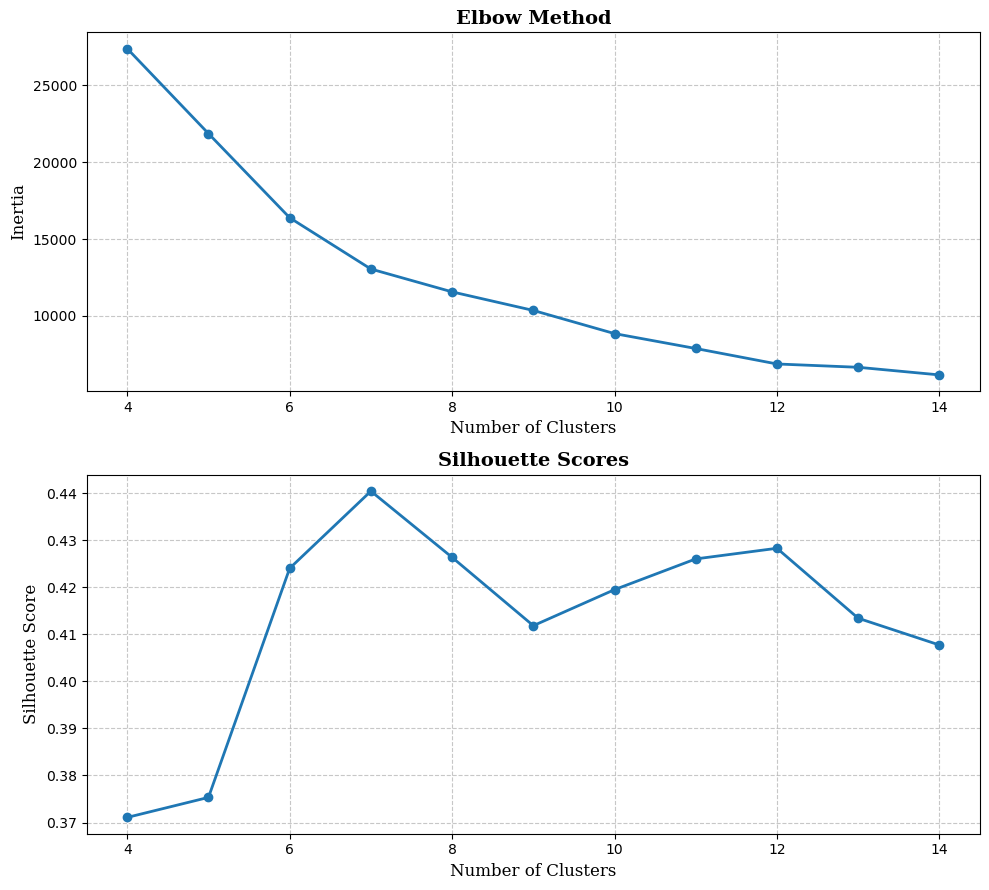

In [166]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 9))

ax1.plot(k_range, inertia_values, marker="o", linewidth=2)
ax1.set_xlabel("Number of Clusters", fontsize=12, fontfamily='serif')
ax1.set_ylabel("Inertia", fontsize=12, fontfamily='serif')
ax1.set_title("Elbow Method", fontsize=14, fontweight='bold', fontfamily='serif')
ax1.grid(linestyle='--', alpha=0.7)

ax2.plot(k_range, silhouette_scores, marker="o", linewidth=2)
ax2.set_xlabel("Number of Clusters", fontsize=12, fontfamily='serif')
ax2.set_ylabel("Silhouette Score", fontsize=12, fontfamily='serif')
ax2.set_title("Silhouette Scores", fontsize=14, fontweight='bold', fontfamily='serif')
ax2.grid(linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [143]:
optimal_k = 7  # the optimal K based on the Elbow method and Silhouette score
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
kmeans.fit(scaled_coordinates)

KMeans(n_clusters=7, n_init='auto', random_state=42)

In [144]:
building_permits['cluster'] = kmeans.labels_

In [ ]:
import folium

# Calculate the center of the map based on the average latitude and longitude
map_center = [building_permits['LATITUDE'].mean(), building_permits['LONGITUDE'].mean()]

# Create a Folium map
m = folium.Map(location=map_center, zoom_start=12)

# Define a color map for the clusters
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred',]
# Add the data points to the map
for index, row in building_permits.iterrows():
    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=5,
        popup=f"Cluster: {row['cluster']}",
        color=colors[row['cluster']],
        fill=True,
        fill_opacity=0.1
    ).add_to(m)

# Save the map as an HTML file
m.save("map.html")

In [146]:
import folium
from branca.element import Template, MacroElement

# Calculate the center of the map based on the average latitude and longitude
map_center = [building_permits['LATITUDE'].mean(), building_permits['LONGITUDE'].mean()]

# Create a Folium map with a tile layer that displays location names
m = folium.Map(location=map_center, zoom_start=12, tiles='cartodb positron')

# Define a color map for the clusters
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred']

# Add the data points to the map
for index, row in building_permits.iterrows():
    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=5,
        popup=f"Cluster: {row['cluster']}",
        color=colors[row['cluster']],
        fill=True,
        fill_opacity=0.1
    ).add_to(m)

# Calculate the density of each cluster
cluster_density = building_permits['cluster'].value_counts(normalize=True)

# Create a custom legend
legend_html = '''
<div style="position: fixed; bottom: 10px; left: 10px; width: 200px; height: 100px; background-color: white; padding: 10px; border: 2px solid black; z-index: 9999; font-size: 14px;">
    <b>Cluster colors and densities:</b><br>
'''

for i, color in enumerate(colors):
    legend_html += f'<span style="color: {color};">■</span> Cluster {i}: {cluster_density[i] * 100:.1f}%<br>'

legend_html += '</div>'

# Add the legend to the map
legend = folium.Marker(location=[0, 0], icon=None)
legend.add_child(folium.Popup(legend_html, parse_html=True, max_width='100%'))
m.add_child(legend)

# Save the map as an HTML file
m.save("map3.html")


In [147]:
import folium
from branca.element import Template, MacroElement

# Calculate the center of the map based on the average latitude and longitude
map_center = [building_permits['LATITUDE'].mean(), building_permits['LONGITUDE'].mean()]

# Create a Folium map with a tile layer that displays location names
m = folium.Map(location=map_center, zoom_start=12, tiles='Stamen Toner')

# Define a color map for the clusters
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred']

# Add the data points to the map
for index, row in building_permits.iterrows():
    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=5,
        popup=f"Cluster: {row['cluster']}",
        color=colors[row['cluster']],
        fill=True,
        fill_opacity=0.7
    ).add_to(m)

# Calculate the density of each cluster
cluster_density = building_permits['cluster'].value_counts(normalize=True)

# Create a custom legend
legend_html = '''
<div style="position: fixed; bottom: 10px; left: 10px; width: 200px; height: 100px; background-color: white; padding: 10px; border: 2px solid black; z-index: 9999; font-size: 14px;">
    <b>Cluster colors and densities:</b><br>
'''

for i, color in enumerate(colors):
    legend_html += f'<span style="color: {color};">■</span> Cluster {i}: {cluster_density[i] * 100:.1f}%<br>'

legend_html += '</div>'

# Add the legend to the map
legend = MacroElement()
legend._template = Template(legend_html)
m.get_root().add_child(legend)

# Save the map as an HTML file
m.save("map4.html")


In [148]:
import folium
from branca.element import Template, MacroElement

# Calculate the center of the map based on the average latitude and longitude
map_center = [building_permits['LATITUDE'].mean(), building_permits['LONGITUDE'].mean()]

# Create a Folium map with a tile layer that displays location names
m = folium.Map(location=map_center, zoom_start=12, tiles='CartoDB Positron')

# Define a color map for the clusters
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred']

# Add the data points to the map
for index, row in building_permits.iterrows():
    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=5,
        popup=f"Cluster: {row['cluster']}",
        color=colors[row['cluster']],
        fill=True,
        fill_opacity=0.5
    ).add_to(m)

# Calculate the density of each cluster
cluster_density = building_permits['cluster'].value_counts(normalize=True)

# Create a custom legend
legend_html = '''
<div style="position: fixed; bottom: 10px; left: 10px; width: 200px; height: 100px; background-color: white; padding: 10px; border: 2px solid black; z-index: 9999; font-size: 14px;">
    <b>Cluster colors and densities:</b><br>
'''

for i, color in enumerate(colors):
    legend_html += f'<span style="color: {color};">■</span> Cluster {i}: {cluster_density[i] * 100:.1f}%<br>'

legend_html += '</div>'

# Add the legend to the map
legend = MacroElement()
legend._template = Template(legend_html)
m.get_root().add_child(legend)

# Save the map as an HTML file
m.save("map5.html")


In [157]:
import folium
from folium.plugins import FloatImage
from PIL import Image, ImageDraw

# Calculate the center of the map based on the average latitude and longitude
map_center = [building_permits['LATITUDE'].mean(), building_permits['LONGITUDE'].mean()]

# Create a Folium map with a tile layer that displays location names
m = folium.Map(location=map_center, zoom_start=12, tiles='CartoDB Positron')

# Define a color map for the clusters
colors = ['#E6194B', '#3CB44B', '#0082C8', '#F58231', '#911EB4', '#46F0F0', '#FABEBE']

# Add the data points to the map
for index, row in building_permits.iterrows():
    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=1,
        popup=f"Cluster: {row['cluster']}",
        tooltip=f"Cluster: {row['cluster']}",
        color=colors[row['cluster']],
        fill=False,
        fill_opacity=0.1,
        opacity=0.1
    ).add_to(m)

# Calculate the density of each cluster
cluster_density = building_permits['cluster'].value_counts(normalize=True)

# Create a custom legend image using PIL
legend_img = Image.new('RGBA', (200, 100), (255, 255, 255, 192))
draw = ImageDraw.Draw(legend_img)
draw.text((10, 10), "Clusters and theirs densities:", (0, 0, 0))

for i, color in enumerate(colors):
    draw.rectangle([(10, 30 + i * 10), (20, 40 + i * 10)], fill=color)
    draw.text((30, 30 + i * 10), f"Cluster {i}: {cluster_density[i] * 100:.1f}%", (0, 0, 0))

# Save the legend image to a file
legend_img.save('legend.png', 'PNG')

# Add the legend image to the map
# FloatImage('legend.png', bottom=0, left=86).add_to(m)
FloatImage('legend.png', bottom=0, left=80).add_to(m)

# Save the map as an HTML file
m.save("map6.html")


In [161]:
import folium
from folium.plugins import FloatImage
from PIL import Image, ImageDraw

# Calculate the center of the map based on the average latitude and longitude
map_center = [building_permits['LATITUDE'].mean(), building_permits['LONGITUDE'].mean()]

# Create a Folium map with a tile layer that displays location names
m = folium.Map(location=map_center, zoom_start=12, tiles='CartoDB Positron')

# Define a color map for the clusters
colors = ['#E6194B', '#3CB44B', '#0082C8', '#F58231', '#911EB4', '#46F0F0', '#FABEBE']

# Add the data points to the map
for index, row in building_permits.iterrows():
    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=1,
        popup=f"Cluster: {row['cluster']}",
        tooltip=f"Cluster: {row['cluster']}",
        color=colors[row['cluster']],
        fill=False,
        fill_opacity=0.1,
        opacity=0.1
    ).add_to(m)

# Calculate the density of each cluster
cluster_density = building_permits['cluster'].value_counts(normalize=True)

# Create a custom legend image using PIL
legend_img = Image.new('RGBA', (300, 200), (255, 255, 255, 192))
draw = ImageDraw.Draw(legend_img)
draw.text((10, 10), "Clusters and their densities:", (0, 0, 0))

for i, color in enumerate(colors):
    draw.rectangle([(10, 30 + i * 20), (30, 50 + i * 20)], fill=color)
    draw.text((40, 30 + i * 20), f"Cluster {i}: {cluster_density[i] * 100:.1f}%", (0, 0, 0))

# Save the legend image to a file
legend_img.save('legend_large.png', 'PNG')

# Add the legend image to the map
FloatImage('legend_large.png', bottom=10, left=10).add_to(m)

# Save the map as an HTML file
m.save("map_large_legend.html")


In [97]:
building_permits.cluster.unique()

array([3, 6, 5, 0, 1, 4, 2])

In [98]:
cluster_density = building_permits.groupby('cluster')['PERMIT_ID'].count()
print(cluster_density)

cluster
0    11200
1     5850
2     3602
3     7802
4     3745
5    11827
6     4275
Name: PERMIT_ID, dtype: int64


In [99]:
building_permits_2022[['LASTMODIFIEDDATE', 'ISSUE_DATE', 'PERMIT_ID']].head()

,LASTMODIFIEDDATE,ISSUE_DATE,PERMIT_ID
0,2022/04/29 12:26:17+00,2022/02/23 05:00:00+00,E59783244
1,2022/04/29 12:26:34+00,2022/02/23 05:00:00+00,E49961806
2,2022/04/29 12:26:52+00,2022/02/23 05:00:00+00,E30487069
3,2023/04/15 13:57:47+00,2022/09/27 04:00:00+00,BP2205285
4,2023/04/14 14:07:22+00,2022/04/19 04:00:00+00,M2202353


In [100]:
building_permits_2022.columns


Index(['X', 'Y', 'OBJECTID', 'DCRAINTERNALNUMBER', 'ISSUE_DATE', 'PERMIT_ID',
       'PERMIT_TYPE_NAME', 'PERMIT_SUBTYPE_NAME', 'PERMIT_CATEGORY_NAME',
       'APPLICATION_STATUS_NAME', 'FULL_ADDRESS', 'DESC_OF_WORK', 'SSL',
       'ZONING', 'PERMIT_APPLICANT', 'FEE_TYPE', 'FEES_PAID', 'OWNER_NAME',
       'LASTMODIFIEDDATE', 'CITY', 'STATE', 'LATITUDE', 'LONGITUDE', 'XCOORD',
       'YCOORD', 'ZIPCODE', 'MARADDRESSREPOSITORYID', 'DCSTATADDRESSKEY',
       'DCSTATLOCATIONKEY', 'WARD', 'ANC', 'SMD', 'DISTRICT', 'PSA',
       'NEIGHBORHOODCLUSTER', 'HOTSPOT2006NAME', 'HOTSPOT2005NAME',
       'HOTSPOT2004NAME', 'BUSINESSIMPROVEMENTDISTRICT', 'GLOBALID',
       'CREATED_USER', 'CREATED_DATE', 'LAST_EDITED_USER', 'LAST_EDITED_DATE'],
      dtype='object')

In [101]:
#import pandas as pd
# import holoviews as hv
from shapely.geometry import Point
import geopandas as gpd

In [102]:
# Convert the DataFrame to a GeoDataFrame
geometry = [Point(xy) for xy in zip(building_permits.LONGITUDE, building_permits.LATITUDE)]
crs = {'init': 'epsg:4326'}
geo_df = gpd.GeoDataFrame(building_permits, crs=crs, geometry=geometry)

# Buffer the points by 0.5 miles (about 804.5 meters)
buffered_geo_df = geo_df.to_crs({'init': 'epsg:3857'})
buffered_geo_df['geometry'] = buffered_geo_df['geometry'].buffer(804.5)
buffered_geo_df = buffered_geo_df.to_crs({'init': 'epsg:4326'})

c:\Users\meetd\anaconda3\envs\building_permits_dc\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
c:\Users\meetd\anaconda3\envs\building_permits_dc\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [103]:
buffered_geo_df.head()

,X,Y,ISSUE_DATE,PERMIT_ID,PERMIT_TYPE_NAME,PERMIT_SUBTYPE_NAME,PERMIT_CATEGORY_NAME,FULL_ADDRESS,DESC_OF_WORK,SSL,...,YCOORD,MARADDRESSREPOSITORYID,WARD,ANC,SMD,DISTRICT,PSA,NEIGHBORHOODCLUSTER,cluster,geometry
3,-77.013368,38.966306,2022-09-27 04:00:00+00:00,BP2205285,POST CARD,BUILDING,NaN,"121 SHERIDAN ST NW, WASHINGTON, DC 20011",NaN,3372 0019,...,144265.03,245568,4,ANC 4B,4B07,FOURTH,406,Cluster 17,3,"POLYGON ((-77.00614 38.96630, -77.00617 38.965..."
4,-77.001663,38.956660,2022-04-19 04:00:00+00:00,M2202353,SUPPLEMENTAL,MECHANICAL,NaN,"5549 SOUTH DAKOTA AVE NE, WASHINGTON, DC 20011",NaN,3760 0843,...,143194.13,299743,4,ANC 4B,4B09,FOURTH,406,Cluster 19,3,"POLYGON ((-76.99443 38.95665, -76.99447 38.956..."
6,-76.967832,38.925094,2022-07-16 04:00:00+00:00,BP2204165,POST CARD,BUILDING,NaN,"2723 28TH ST NE, WASHINGTON, DC 20018",NaN,4346 0017,...,139690.58,45057,5,ANC 5C,5C02,FIFTH,503,Cluster 22,6,"POLYGON ((-76.96060 38.92509, -76.96064 38.924..."
7,-77.036963,38.911326,2022-07-16 04:00:00+00:00,E2209361,SUPPLEMENTAL,ELECTRICAL,NaN,"1600 16TH ST NW, WASHINGTON, DC 20009",NaN,0179 0817,...,138162.36,241998,2,ANC 2B,2B04,THIRD,301,Cluster 6,5,"POLYGON ((-77.02973 38.91132, -77.02977 38.910..."
8,-77.013943,38.941851,2022-07-16 04:00:00+00:00,E2209362,SUPPLEMENTAL,ELECTRICAL,NaN,"209 ROCK CREEK CHURCH RD NW, WASHINGTON, DC 20011",NaN,3316 0046,...,141550.30,244314,4,ANC 4C,4C06,FOURTH,407,Cluster 18,3,"POLYGON ((-77.00671 38.94184, -77.00675 38.941..."


In [104]:
buffered_geo_df.columns

Index(['X', 'Y', 'ISSUE_DATE', 'PERMIT_ID', 'PERMIT_TYPE_NAME',
       'PERMIT_SUBTYPE_NAME', 'PERMIT_CATEGORY_NAME', 'FULL_ADDRESS',
       'DESC_OF_WORK', 'SSL', 'ZONING', 'PERMIT_APPLICANT', 'FEE_TYPE',
       'FEES_PAID', 'OWNER_NAME', 'LASTMODIFIEDDATE', 'LATITUDE', 'LONGITUDE',
       'XCOORD', 'YCOORD', 'MARADDRESSREPOSITORYID', 'WARD', 'ANC', 'SMD',
       'DISTRICT', 'PSA', 'NEIGHBORHOODCLUSTER', 'cluster', 'geometry'],
      dtype='object')

In [105]:
from geopandas.tools import sjoin

# buffered_geo_df = buffered_geo_df.to_crs({'init': 'epsg:3857'})
# join_df = sjoin(buffered_geo_df, buffered_geo_df, how='inner', op='intersects', lsuffix='left', rsuffix='right')
# construction_count = join_df.groupby('index_left').size()
# buffered_geo_df['construction_count'] = construction_count
# buffered_geo_df = buffered_geo_df.to_crs({'init': 'epsg:4326'})


In [106]:
# Initializing the construction_count column
buffered_geo_df['construction_count'] = 0

# Dividing the dataset into smaller chunks
chunk_size = 1000
chunks = [buffered_geo_df[i:i + chunk_size] for i in range(0, buffered_geo_df.shape[0], chunk_size)]

buffered_geo_df = buffered_geo_df.to_crs({'init': 'epsg:3857'})

# Calculating the construction_count for each chunk
for chunk in chunks:
    chunk = chunk.to_crs({'init': 'epsg:3857'})
    
    # Setting the index explicitly for both DataFrames
    chunk.index.name = 'index_left'
    buffered_geo_df.index.name = 'index_right'
    
    join_df = sjoin(chunk, buffered_geo_df, how='inner', op='intersects', lsuffix='left', rsuffix='right')
    construction_count = join_df.groupby('index_left').size()
    
    # Updating the construction_count in the original buffered_geo_df
    for index, count in construction_count.items():
        buffered_geo_df.loc[index, 'construction_count'] = count

buffered_geo_df = buffered_geo_df.to_crs({'init': 'epsg:4326'})

c:\Users\meetd\anaconda3\envs\building_permits_dc\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


ImportError: Spatial indexes require either `rtree` or `pygeos`. See installation instructions at https://geopandas.org/install.html

In [ ]:
import numpy as np
from sklearn.neighbors import BallTree

# Convert the coordinates to radians
coords = np.radians(buffered_geo_df[['LATITUDE', 'LONGITUDE']].values)

# Earth's mean radius in meters
earth_radius = 6371000

# Create a BallTree for efficient distance calculations
ball_tree = BallTree(coords, metric='haversine')

# Find the number of points within a 0.5-mile radius (about 804.5 meters)
radius = 804.5 / earth_radius

# Query the BallTree for the construction count within the radius
buffered_geo_df['construction_count'] = ball_tree.query_radius(coords, r=radius, count_only=True)

In [ ]:
l = [cnt for cnt in buffered_geo_df.construction_count]

In [ ]:
len(l)

48301

In [ ]:
l[:5]

[555, 680, 458, 1780, 825]

In [ ]:
sum(l)

53559807

In [ ]:
threshold = buffered_geo_df['construction_count'].quantile(0.75) 

In [ ]:
from shapely.geometry import Polygon

# Calculate the bounding box of the study area
bounds = buffered_geo_df.to_crs({'init': 'epsg:3857'}).bounds

min_x = bounds.minx.min()
min_y = bounds.miny.min()
max_x = bounds.maxx.max()
max_y = bounds.maxy.max()




/Users/admin/Documents/data_mining_project/venv/lib/python3.8/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [ ]:
# Set the size of the cells (0.5 miles in meters)
cell_size = 804.5

# Generate the grid cells
x_coords = np.arange(min_x, max_x, cell_size)
y_coords = np.arange(min_y, max_y, cell_size)
polygons = []



In [ ]:
for x in x_coords:
    for y in y_coords:
        polygons.append(Polygon([(x, y), (x + cell_size, y), (x + cell_size, y + cell_size), (x, y + cell_size)]))

grid = gpd.GeoDataFrame({'geometry': polygons}, crs={'init': 'epsg:3857'})
grid = grid.to_crs({'init': 'epsg:4326'})

/Users/admin/Documents/data_mining_project/venv/lib/python3.8/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/admin/Documents/data_mining_project/venv/lib/python3.8/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [ ]:
# Spatial join between buffered_geo_df and grid
buffered_geo_df = buffered_geo_df.to_crs({'init': 'epsg:3857'})
point_grid_join = gpd.sjoin(buffered_geo_df, grid, how='left', op='within', rsuffix='_grid')



/Users/admin/Documents/data_mining_project/venv/lib/python3.8/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/admin/Documents/data_mining_project/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3400: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/var/folders/62/zwkvsc2d3tngnd336zgb5n3m0000gn/T/ipykernel_37838/633905014.py:3: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EP

In [ ]:
# Perform the spatial join
point_grid_join = gpd.sjoin(grid.reset_index().rename(columns={'index': 'index_grid'}), geo_df, how='inner', op='intersects')

# Calculate the construction count per grid cell
construction_count_per_cell = point_grid_join.groupby('index_grid').size()
grid['construction_count'] = construction_count_per_cell
grid = grid.to_crs({'init': 'epsg:4326'})


/Users/admin/Documents/data_mining_project/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3400: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/Users/admin/Documents/data_mining_project/venv/lib/python3.8/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [ ]:
threshold = grid['construction_count'].quantile(0.75)
grid['high_prob'] = grid['construction_count'] >= threshold



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



In [ ]:
# Prepare the dataset


# Define the target variable
threshold =  grid['construction_count'].quantile(0.75)
grid['high_construction'] = (grid['construction_count'] > threshold).astype(int)



In [ ]:
threshold

147.0

In [ ]:
# Split the dataset into training and testing sets
X = grid.drop(columns=['construction_count', 'high_construction', 'geometry'])
y = grid['high_construction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train a logistic regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [ ]:



# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 1.00
Precision: 0.94
Recall: 1.00
F1 Score: 0.97


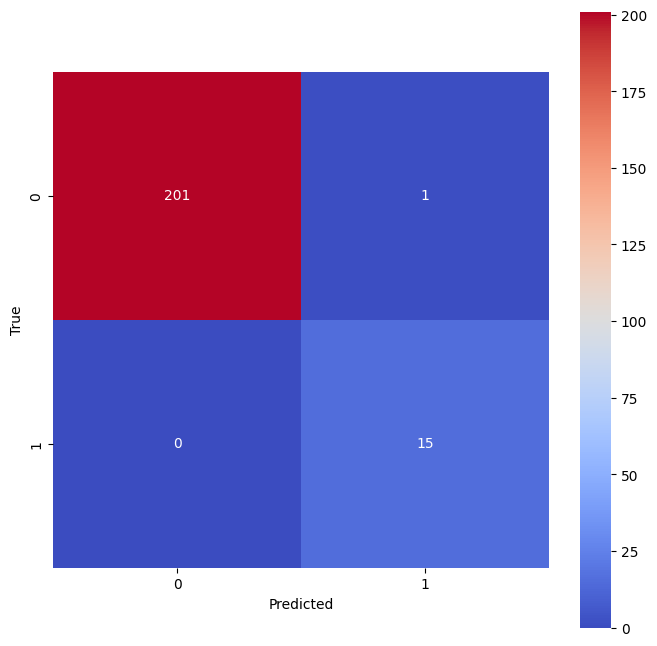

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', square=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



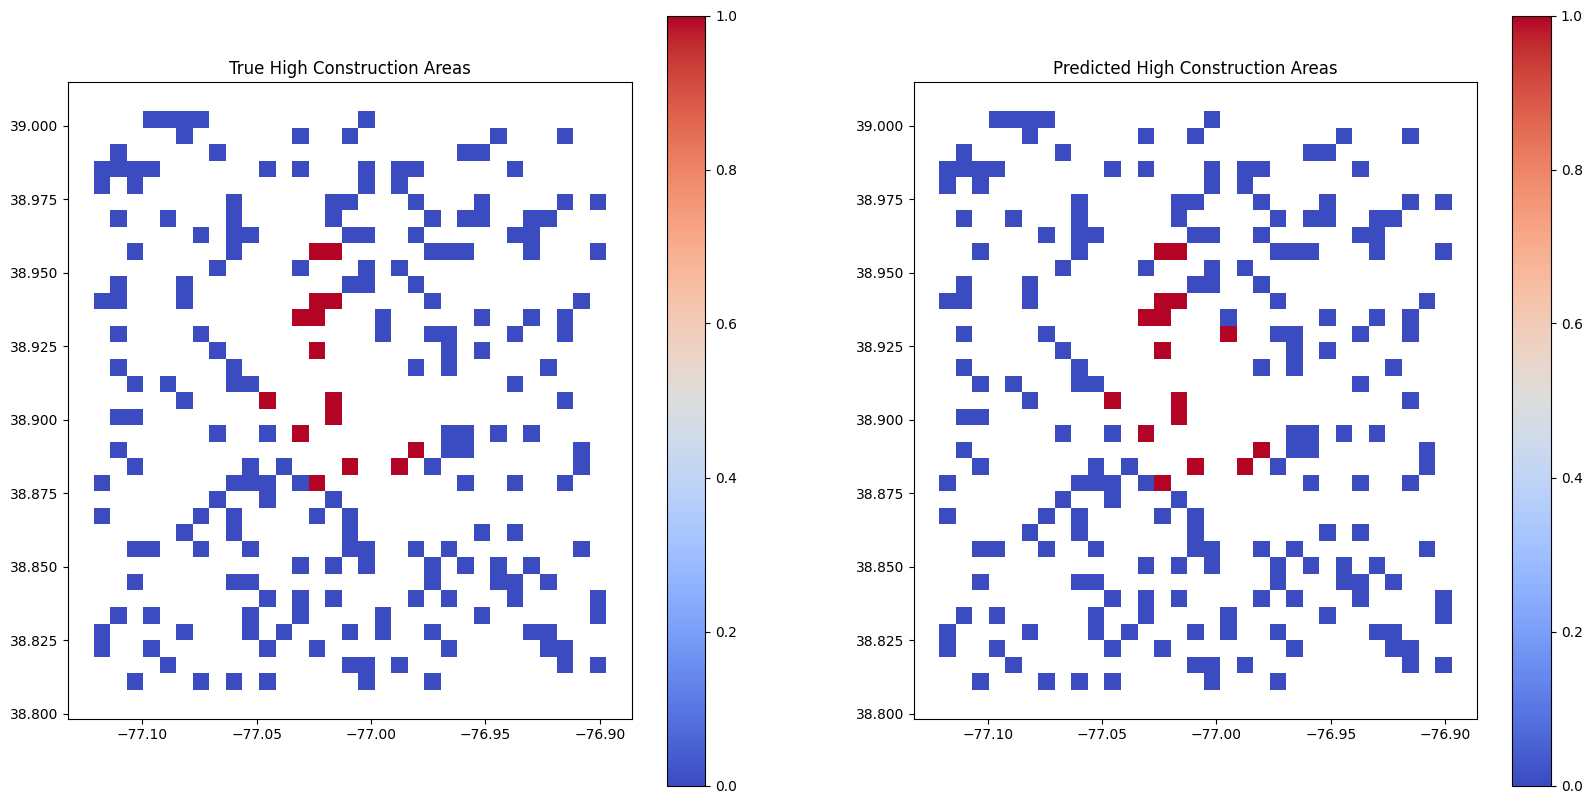

In [ ]:
import geopandas as gpd

# Create a GeoDataFrame with the test data and the predicted values
test_gdf = grid.loc[X_test.index].copy()
test_gdf['predicted_high_construction'] = y_pred

# Plot the true and predicted high construction areas
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

test_gdf.plot(column='high_construction', cmap='coolwarm', legend=True, ax=ax[0])
ax[0].set_title('True High Construction Areas')

test_gdf.plot(column='predicted_high_construction', cmap='coolwarm', legend=True, ax=ax[1])
ax[1].set_title('Predicted High Construction Areas')

plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
scores = cross_val_score(clf, X, y, cv=5, scoring='f1')

# Print the mean and standard deviation of the F1 scores
print(f"Mean F1 Score: {scores.mean():.2f}")
print(f"Standard Deviation: {scores.std():.2f}")


Mean F1 Score: 0.99
Standard Deviation: 0.01


In [ ]:
#df = pd.read_csv("../Metro_mlp_uc_sfrcondo_sm_month.csv")

FileNotFoundError: [Errno 2] No such file or directory: '../Metro_mlp_uc_sfrcondo_sm_month.csv'

In [ ]:
#df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,...,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31
0,102001,0,United States,country,NaN,263267.0,271267.0,276633.0,280000.0,280300.0,...,387967.0,393300.0,393300.0,391300.0,386633.0,381667.0,375733.0,371900.0,371900.0,374833.0
1,394913,1,"New York, NY",msa,NY,503000.0,513000.0,521300.0,526300.0,528300.0,...,617667.0,613330.0,606330.0,599663.0,606333.0,612999.0,619333.0,619333.0,624667.0,634967.0
2,753899,2,"Los Angeles, CA",msa,CA,721333.0,735000.0,743333.0,750000.0,749667.0,...,924967.0,920633.0,910333.0,901667.0,897667.0,894333.0,887667.0,882633.0,885967.0,892967.0
3,394463,3,"Chicago, IL",msa,IL,284600.0,294600.0,300600.0,302267.0,301967.0,...,323300.0,324967.0,322967.0,319967.0,314967.0,308600.0,302933.0,299300.0,302167.0,308833.0
4,394514,4,"Dallas, TX",msa,TX,322997.0,328497.0,331797.0,332800.0,329502.0,...,432663.0,438297.0,434967.0,428300.0,419000.0,410667.0,403667.0,398000.0,396667.0,400300.0


In [ ]:
! pip install osmnx

import osmnx as ox


In [ ]:

place_name = "Washington, District of Columbia, USA"

# Create a graph from OpenStreetMap data
G = ox.graph_from_place(place_name, network_type='drive')


In [ ]:
#38.923233391747246, -77.04401030878196 start
# 38.89048275176211, -77.02685596802488 end
import networkx as nx

origin_latitude, origin_longitude = 38.923233391747246, -77.04401030878196
destination_latitude, destination_longitude = 38.89048275176211, -77.02685596802488
# Set the origin and destination using their latitudes and longitudes
origin = (origin_latitude, origin_longitude)
destination = (destination_latitude, destination_longitude)

# Find the nearest nodes to the origin and destination
origin_node = ox.distance.nearest_nodes(G, X=[origin[1]], Y=[origin[0]])[0]
destination_node = ox.distance.nearest_nodes(G, X=[destination[1]], Y=[destination[0]])[0]

# Calculate the shortest path using Dijkstra's algorithm
shortest_path = nx.dijkstra_path(G, origin_node, destination_node, weight='length')


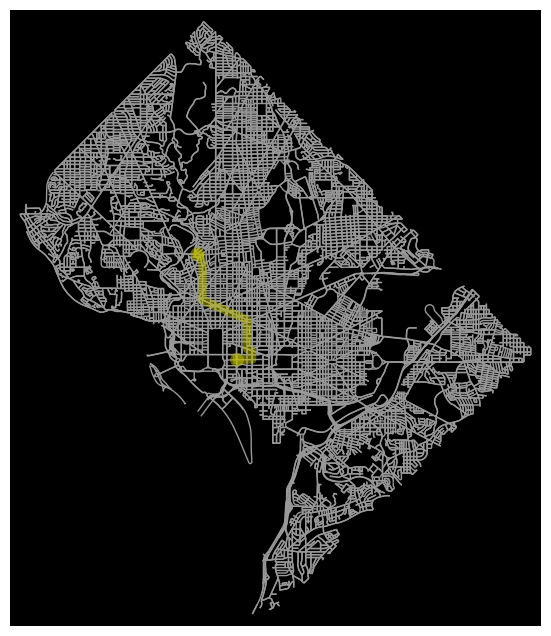

In [ ]:

# Extract the coordinates of the nodes in the shortest path
shortest_path_coords = [(G.nodes[node]['y'], G.nodes[node]['x']) for node in shortest_path]

# Plot the route
fig, ax = ox.plot_graph_route(G, shortest_path, route_linewidth=6, node_size=0, bgcolor='k', route_color='y')

In [ ]:
! pip install geopy
import geopy.distance

def construction_impact(G, construction_data, impact_radius=500):
    for u, v, data in G.edges(data=True):
        edge_coords = (G.nodes[u]['y'], G.nodes[u]['x']), (G.nodes[v]['y'], G.nodes[v]['x'])
        edge_midpoint = ((edge_coords[0][0] + edge_coords[1][0]) / 2, (edge_coords[0][1] + edge_coords[1][1]) / 2)

        data['construction_impact'] = 0

        for construction in construction_data:
            construction_coords = (construction['latitude'], construction['longitude'])
            distance = geopy.distance.distance(edge_midpoint, construction_coords).m

            if distance < impact_radius:
                data['construction_impact'] += 1


  Using cached geopy-2.3.0-py3-none-any.whl (119 kB)
  Using cached geographiclib-2.0-py3-none-any.whl (40 kB)


In [ ]:
building_permits.columns

Index(['X', 'Y', 'ISSUE_DATE', 'PERMIT_ID', 'PERMIT_TYPE_NAME',
       'PERMIT_SUBTYPE_NAME', 'PERMIT_CATEGORY_NAME', 'FULL_ADDRESS',
       'DESC_OF_WORK', 'SSL', 'ZONING', 'PERMIT_APPLICANT', 'FEE_TYPE',
       'FEES_PAID', 'OWNER_NAME', 'LASTMODIFIEDDATE', 'LATITUDE', 'LONGITUDE',
       'XCOORD', 'YCOORD', 'MARADDRESSREPOSITORYID', 'WARD', 'ANC', 'SMD',
       'DISTRICT', 'PSA', 'NEIGHBORHOODCLUSTER', 'CREATED_DATE', 'cluster',
       'geometry'],
      dtype='object')

In [ ]:
construction_data = [
    {"latitude": lat, "longitude": long} for lat, long in zip(building_permits.LATITUDE, building_permits.LONGITUDE) 
]



In [ ]:
construction_data

[{'latitude': 38.96629823, 'longitude': -77.01336587},
 {'latitude': 38.95665171, 'longitude': -77.00166069},
 {'latitude': 38.92508664, 'longitude': -76.96782952},
 {'latitude': 38.91131851, 'longitude': -77.03696041},
 {'latitude': 38.94184315, 'longitude': -77.01394092},
 {'latitude': 38.88525864, 'longitude': -77.00327978},
 {'latitude': 38.93120656, 'longitude': -77.04105268},
 {'latitude': 38.93798143, 'longitude': -77.06089702},
 {'latitude': 38.91428654, 'longitude': -77.00247894},
 {'latitude': 38.91720745, 'longitude': -77.02624865},
 {'latitude': 38.91428654, 'longitude': -77.00247894},
 {'latitude': 38.91338439, 'longitude': -77.02338483},
 {'latitude': 38.96737402, 'longitude': -77.06462019},
 {'latitude': 38.85536207, 'longitude': -76.97961085},
 {'latitude': 38.90510347, 'longitude': -76.97707893},
 {'latitude': 38.9049911, 'longitude': -76.98942145},
 {'latitude': 38.92670066, 'longitude': -77.08045576},
 {'latitude': 38.92670066, 'longitude': -77.08045576},
 {'latitude

In [ ]:
construction_impact(G, construction_data)


In [ ]:

from sklearn.model_selection import train_test_split
 
X = building_permits.drop(['ISSUE_DATE', 'high_prob'], axis=1)
y = building_permits['high_prob']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 
from sklearn.ensemble import RandomForestClassifier
 
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
 
y_pred = clf.predict(X_test)
 
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
 
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
 
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Confusion Matrix:", confusion)
 
# building_permits['cluster'] = kmeans.labels_
cluster_counts = building_permits.groupby('cluster').size().reset_index(name='num_permits')
threshold = 5000
cluster_counts['high_prob'] = (cluster_counts['num_permits'] > threshold).astype(int)
building_permits = building_permits.merge(cluster_counts[['cluster', 'high_prob']], on='cluster', how='left')